In [36]:
##Correlation analysis: 
#(Generalized linear mixed effect models) 

#Type of Motivation - > using sport apps (wether? how often? What for?)

#Age (Median or continuous variable) and motivation -> use of sport apps 

#Reason for people using app - > how often they are using sport app 



In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

In [131]:
data = pd.read_csv("data.csv")
data


,Unnamed: 0,Gender,Age,Sport Frequency,Type of Sport,Ever used Sportapp,Frequency Sportapp,Reason sportapp,Goals more efficient through sportapp,Motivation when comparing to friends,Amotivation,External Regulation,Introjected Regulation,Identified Regulation,Integrated Regulation,Intrinsic Motivation
0,0,Weiblich,22,5,"Joggen, Ballsportarten (z.B. Fußball, Handball...",Ja,1,"Zum Tracken meiner Leistungen, Um mir Ziele zu...",Ja,Nein,1.25,2.75,4.00,3.50,4.25,4.25
1,1,Weiblich,23,3,"Fitness-Kurse, Tanzen",Ja,1,"Zum Tracken meiner Leistungen, Um das Training...",Ja,Ja,3.00,3.00,4.00,3.75,3.25,3.50
2,2,Weiblich,25,3,"Joggen, Kraftsport, Ballsportarten (z.B. Fußba...",Ja,1,Zum Tracken meiner Leistungen,Ja,Nein,1.25,2.00,4.50,3.00,4.25,4.25
3,3,Weiblich,18,3,"Kraftsport, Ballsportarten (z.B. Fußball, Hand...",Ja,1,"Zum Tracken meiner Leistungen, Um einen Sport-...",Ja,Nein,1.50,2.25,3.25,3.75,5.00,4.00
4,4,Weiblich,18,1,"Ballsportarten (z.B. Fußball, Handball, Basket...",Ja,0,Zum Tracken meiner Leistungen,Ja,Nein,2.25,2.00,3.00,3.00,3.75,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,107,Weiblich,31,5,"Joggen, Yoga",Ja,2,"Zum Tracken meiner Leistungen, Um Kurse zu Buchen",Ja,Ja,2.25,2.75,3.75,2.50,3.75,3.50
103,108,Weiblich,65,5,Walken,Nein,0,Benutze keine Sportapp,Nein,Nein,1.00,1.00,2.00,1.00,1.00,1.00
104,110,Weiblich,64,3,Fitness-Kurse,Ja,1,"Zum Tracken meiner Leistungen, Um Kurse zu Buc...",Ja,Nein,1.50,2.00,4.75,3.50,3.50,4.25
105,111,Männlich,24,3,Badminton,Ja,1,"Zum Tracken meiner Leistungen, Um das Training...",Ja,Ja,2.50,2.25,3.75,3.50,3.75,4.25


In [128]:
meandata = data.groupby('Ever used Sportapp',as_index=False)['Amotivation','External Regulation','Introjected Regulation','Identified Regulation','Integrated Regulation','Intrinsic Motivation'].mean()
meandata = meandata[meandata.columns[1:]]
meandata

<ipython-input-128-fc92293f3a98>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  meandata = data.groupby('Ever used Sportapp',as_index=False)['Amotivation','External Regulation','Introjected Regulation','Identified Regulation','Integrated Regulation','Intrinsic Motivation'].mean()


,Amotivation,External Regulation,Introjected Regulation,Identified Regulation,Integrated Regulation,Intrinsic Motivation
0,1.877717,2.065217,3.793478,3.190217,3.888587,3.782609
1,1.983333,1.883333,3.466667,2.566667,3.366667,3.083333


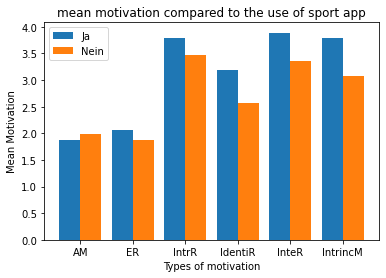

In [129]:
#impact of using sports app on different sports motivation types

X = ['AM','ER','IntrR','IdentiR','InteR','IntrincM'] # motivation types 

data_yes = meandata.iloc[0].to_list()
data_no = meandata.iloc[1].to_list()

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, data_yes, 0.4, label = 'Ja')
plt.bar(X_axis + 0.2, data_no, 0.4, label = 'Nein')
  
plt.xticks(X_axis, X)
plt.xlabel("Types of motivation")
plt.ylabel("Mean Motivation")
plt.title("mean motivation compared to the use of sport app")
plt.legend()
plt.show()

In [133]:
meandata = data.groupby('Frequency Sportapp',as_index=False)['Amotivation','External Regulation','Introjected Regulation','Identified Regulation','Integrated Regulation','Intrinsic Motivation'].mean()
meandata = meandata[meandata.columns[1:]]
meandata

<ipython-input-133-12a8c43667dc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  meandata = data.groupby('Frequency Sportapp',as_index=False)['Amotivation','External Regulation','Introjected Regulation','Identified Regulation','Integrated Regulation','Intrinsic Motivation'].mean()


,Amotivation,External Regulation,Introjected Regulation,Identified Regulation,Integrated Regulation,Intrinsic Motivation
0,1.852941,1.764706,3.264706,2.500000,3.455882,3.250000
1,1.957547,2.165094,3.801887,3.250000,3.905660,3.764151
2,1.854167,2.125000,3.989583,3.177083,3.781250,3.697917
3,1.750000,1.730769,3.711538,3.153846,3.980769,3.903846


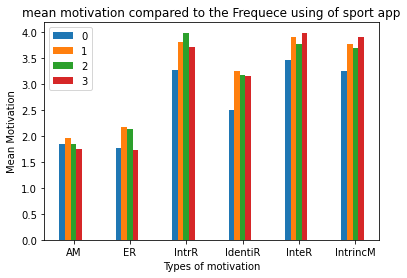

In [141]:
#impact of frequency in using sports app on different sports motivation types

X = ['AM','ER','IntrR','IdentiR','InteR','IntrincM'] # motivation types 

data_0 = meandata.iloc[0].to_list()
data_1 = meandata.iloc[1].to_list()
data_2 = meandata.iloc[2].to_list()
data_3 = meandata.iloc[3].to_list()

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, data_0, 0.1, label = '0')
plt.bar(X_axis - 0.1, data_1, 0.1, label = '1')
plt.bar(X_axis , data_2, 0.1, label = '2')
plt.bar(X_axis + 0.1, data_3, 0.1, label = '3')
  
plt.xticks(X_axis, X)
plt.xlabel("Types of motivation")
plt.ylabel("Mean Motivation")
plt.title("mean motivation compared to the Frequece using of sport app")
plt.legend()
plt.show()